In [1]:
include("cliff4.jl")

U(a...) = cat(a...,dims=1)

U (generic function with 1 method)

## Density matrix entanglement entropy

123456789101112131415161718192021222324252627282930313233343536373839404142434445464748495051525354555657585960616263646566676869707172737475767778798081828384858687888990919293949596979899100

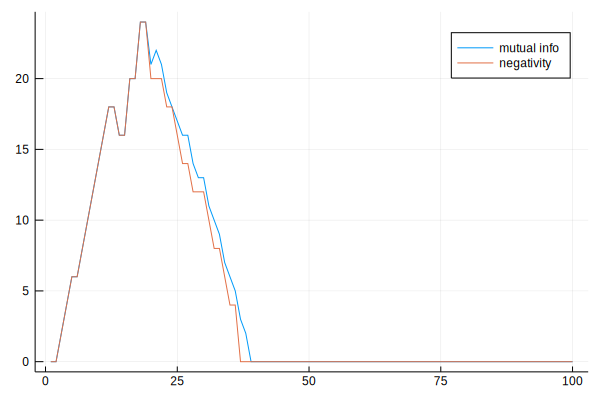

In [2]:
function main(N, time_step)
    state = all_up(N)
    result1 = [0.0 for _ in 1:time_step]
    result2 = [0.0 for _ in 1:time_step]
    result3 = [0.0 for _ in 1:time_step]

    for i in 1:time_step

        tmp = sub_area_state(state, 76:125)
        result1[i] = rk(tmp[:, 1:25]) + rk(tmp[:, 26:50]) - size(tmp)[1]
        result2[i] = binary_rank(sign_mat(tmp[:, 1:25]))
        
        for posi in 1:(N ÷ 2)
            cliff2_action(random_2clifford(), state, posi*2 - 1)
        end

        for posi in 1:(N ÷ 2 - 1)
            cliff2_action(random_2clifford(), state, posi*2)
        end
        print(i)
        
    end

     plot(result1,label="mutual info")
    plot!(result2, label="negativity")
end

main(200, 100)

## Operator Entanglement Entropy

The left half array represents "out" and the right half represents "in".

In this section, from left the right, the name for the areas are: $C, D, A, B$

## Operator Entanglement Entropy II

1234567891011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556575859606162636465666768697071727374757677787980818283848586878889909192939495969798991001011021031041051061071081091101111121131141151161171181191201211221231241251261271281291301311321331341351361371381391401411421431441451461471481491501511521531541551561571581591601611621631641651661671681691701711721731741751761771781791801811821831841851861871881891901911921931941951961971981992001234567891011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556575859606162636465666768697071727374757677787980818283848586878889909192939495969798991001011021031041051061071081091101111121131141151161171181191201211221231241251261271281291301311321331341351361371381391401411421431441451461471481491501511521531541551561571581591601611621631641651661671681691701711721731741751761771781791801811821831841851861871881891901911921931941951961971981992001234567891011121

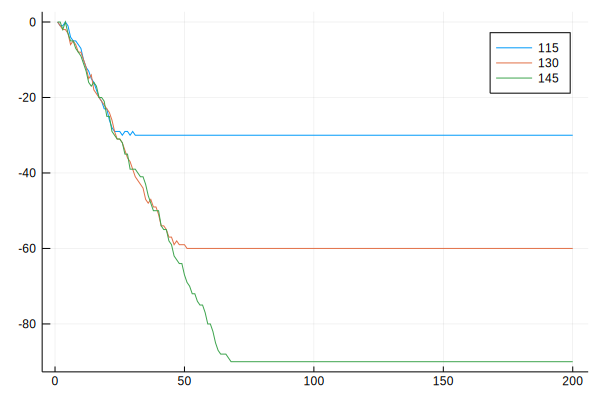

In [8]:
L = 200

t_steps = 200

in_left = 101
in_right = 110

out_left = 96
out_right = 200

plot()
for in_right in [115 130 145]
    out_right = in_right
    
    A = (L+in_left):(L+in_right)
    B = out_left:out_right
    C = U(1:(out_left-1), (out_right+1):L)

    S_A = in_right - in_left + 1

    result1 = zeros(t_steps)
    result2 = zeros(t_steps)
    result3 = zeros(t_steps)
    result4 = zeros(t_steps)
    result5 = zeros(t_steps)
    result6 = zeros(t_steps)

    state = bell_pairs(L)

    for t in 1:t_steps

        I_AB = rk(state[:, A]) + rk(state[:, B]) - rk(state[:, U(A,B)])
        I_AC = rk(state[:, A]) + rk(state[:, C]) - rk(state[:, U(A,C)])
        I_ABC= rk(state[:, A]) + rk(state[:, U(B, C)]) - rk(state[:, U(A, B, C)])

        result1[t] = I_AB + I_AC - I_ABC

        for posi in 1:(L ÷ 2)
            cliff2_action(random_2clifford(), state, posi*2 - 1, posi*2)
        end

        for posi in 1:(L ÷ 2 - 1)
            cliff2_action(random_2clifford(), state, posi*2, posi*2 + 1)
        end

        print(t)
    end

    plot!(result1, label=in_right) 
end

plot!()

### Jonah's Partition

Take d = 5 and intervals B and C comprises the entire output which I take to be large enough such that it is essentially infinite. It is bipartitioned into the green and red regions which are called C and B respectively."
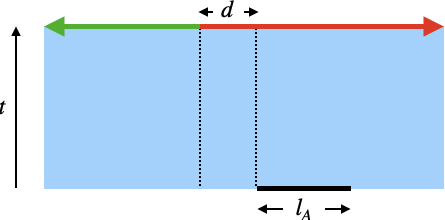

12345678910

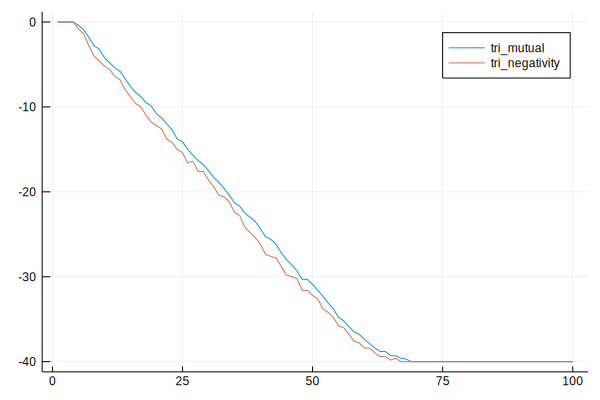

In [5]:
function main()
    L = 200
    n_average = 10
    t_steps = 100
    

    in_left = 101
    in_right = 110

    out_left = 96
    out_right = 200

    plot()
    
    result1 = zeros(t_steps)
    result2 = zeros(t_steps)
    result3 = zeros(t_steps)
    result4 = zeros(t_steps)
    result5 = zeros(t_steps)
    result6 = zeros(t_steps)
    result7 = zeros(t_steps)
    result8 = zeros(t_steps)
    
    for in_right in [120]

        A = (L+in_left):(L+in_right)
        B = out_left:out_right
        C = U(1:(out_left-1), (out_right+1):L)

        S_A = in_right - in_left + 1

        for e in 1:n_average
            
            state = bell_pairs(L)
            for t in 1:t_steps

                state_ABC = sub_area_state(state, U(A, 1:L))
                state_AB = sub_area_state(state, U(A, B))
                state_AC = sub_area_state(state, U(A, C))

                I_AB = rk(state_AB[:, 1:S_A]) + rk(state_AB[:, S_A+1:end]) - rk(state_AB)
                I_AC = rk(state_AC[:, 1:S_A]) + rk(state_AC[:, S_A+1:end]) - rk(state_AC)
                I_ABC= rk(state_ABC[:, 1:S_A]) + rk(state_ABC[:, S_A+1:end]) - rk(state_ABC)
                
                
                result1[t] += I_AB
                result2[t] += I_AC
                result3[t] += I_ABC
                result7[t] += I_AB + I_AC - I_ABC

                N_AB = negativity(state_AB, 1:S_A)
                N_AC = negativity(state_AC, 1:S_A)
                N_ABC= negativity(state_ABC, 1:S_A)
                
                result4[t] += N_AB
                result5[t] += N_AC
                result6[t] += N_ABC
                result8[t] += N_AB + N_AC - N_ABC

                for posi in 1:(L ÷ 2)
                    cliff2_action(random_2clifford(), state, posi*2 - 1, posi*2)
                end

                for posi in 1:(L ÷ 2 - 1)
                    cliff2_action(random_2clifford(), state, posi*2, posi*2 + 1)
                end    
            end
            print(e)
        end


        plot!(result7 ./ n_average, label="tri_mutual")
        plot!(result8 ./ n_average, label="tri_negativity")
        
    end

    return result1, result2, result3, result4, result5, result6, result7, result8
end

result1, result2, result3, result4, result5, result6, result7, result8 = main()
plot!()

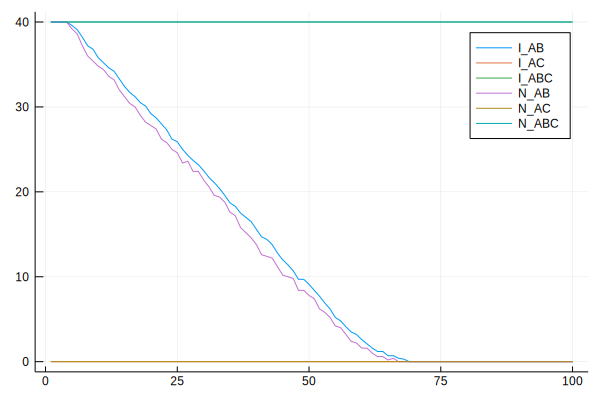

In [6]:
n_average = 10
plot()
plot!(result1 ./ n_average, label="I_AB")
plot!(result2 ./ n_average, label="I_AC")
plot!(result3 ./ n_average, label="I_ABC")
plot!(result4 ./ n_average, label="N_AB")
plot!(result5 ./ n_average, label="N_AC")
plot!(result6 ./ n_average, label="N_ABC")